## **Análisis de Datos Segmentación de clientes potenciales (Customer Segmentation)**


### **Comprension del negocio**

**INTRODUCCION**

La segmentación de clientes es la práctica de dividir una base de clientes en grupos de individuos que son similares en aspectos específicos relevantes para el marketing, como la edad, el género, los intereses y los hábitos de gasto.

Las empresas que emplean la segmentación de clientes parten del hecho de que cada cliente es diferente, en preferencias y necesidades, y de que los esfuerzos de marketing se verían más favorecidos si se dirigen mensajes a grupos de segmentos específicos.

**ENTORNO DE LA EMPRESA**

Una empresa de consumo tiene previsto entrar en nuevos mercados con sus productos actuales (P1, P2, P3, P4 y P5). Tras un intenso estudio de mercado, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En el mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D ). A continuación, han llevado a cabo una difusión y comunicación segmentada para un segmento diferente de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los clientes potenciales en los nuevos mercados.

**OBJETIVO**

En este proyecto de aprendizaje automático, nuestro objetivo es crear un modelo para predecir adecuadamente la Categorizacion/Clasificacion de los nuevos clientes.

### **Estructura del dataset**

***El conjunto de datos contiene información de clientes en 11 variables, donde 9 variables son caracteristicas demograficas, que permite a la empresa clasificar en segmentos de clientes para fines de marketing.***


- **ID:** Identificación única

- **Gender:** Género del cliente

- **Ever_Married:** Estado civil del cliente

- **Age:** Edad del cliente

- **Graduated:** ¿Es el cliente un graduado?

- **Profession:** Profesión del cliente

- **Work_Experience:** Experiencia laboral en años

- **Spending_Score:** Puntuación del gasto del cliente

- **Family_Size:** Número de miembros de la familia del cliente.

- **Var_1:** Categoría anónima del cliente

- **Segmentation:** (target) Segmento del cliente


### **Bibliotecas**

## Instalando librerías 

In [1]:
%pip install --pre pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


#### **Cargando librerias**

##### Para el análisis de datos y el conjunto de datos

In [3]:
# Para instalar procesamiento de datos
import numpy as np
import pandas as pd

##### Para preprocesamiento y el modelo

In [4]:
#Importar la liberias de Pycaret
from pycaret.classification import *

##### Para gráficos

In [5]:
# Para instalar manejadores de graficos
import plotly.express as px #Liberia para graficos

### **Carga de Datos**

**Establecer la ruta de ubicacion del archivo con los datos**

In [6]:
# Creación del dataframe (en todas las celdas de código que se requieran)
archivo_url = "https://raw.githubusercontent.com/Emilca/Pstg_UNI_Ciencia_Datos/main/Datasets/Customer_segmentation/customer_segmentation_train_old.csv"

***Creación del DataFrame para un conjunto de datos determinado, en este caso usaré el conjunto de datos "Segmentation"***

In [7]:
data = pd.read_csv(archivo_url) #los datos están separados por comas
print(data.head(5)) #vista del dataframe

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  


In [8]:
print(" ")
print(f"El dataframe tiene {list(data.shape)[0]} filas y {list(data.shape)[1]} columnas")

 
El dataframe tiene 8068 filas y 11 columnas


### **Preparando datos del dataframe**

#### **Info del dataset**

In [9]:
print(data.info()) #Muestra los nombres de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


Verifica si hay valores NaN

In [10]:
print(data.isnull().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


<h4><b><font color="#024A86">
---> Existen valores nulos y puede existir valores duplicados

</font></b></h4>

#### **Limpiando el dataset**

Limpiando y rellenando con valores el dataset


In [11]:
#Limpiando el dataset con los valores más cercanos
#
#alguna vez casado
#data.fillna(value = {'Ever_Married':'N/A'})
data['Ever_Married'].fillna(method='ffill', inplace=True)
#alguna vez graduado
data['Graduated'].fillna(method='ffill', inplace=True)
#Profesion
data['Profession'].fillna(method='ffill', inplace=True)
#Experienccia laboral
data['Work_Experience'].fillna(method='ffill', inplace=True)
#Cantidad de familia
data['Family_Size'].fillna(method='ffill', inplace=True)
#Categoria
data['Var_1'].fillna(method='ffill', inplace=True)


Verificando si no hay valores nulos

In [12]:
print(data.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


#### **Eliminando duplicados**

In [13]:
data.drop_duplicates(inplace=True)

#### **Eliminando Variable Id**

**Eliminar columna ID porque es innecesaria al modelo**

In [14]:
data.drop(columns=["ID"], inplace=True) #Eliminado por nombre
#df = df.drop(axis=1, labels=['ID']) #Eliminado por numero de etiqueta

#### **Crear Dataframe con datos limpios**

**Respaldamos el dataframe para preprocedar columnas manualmente y luego ingrearlo en pycaret**

In [15]:
df = data.copy()
print(df)

      Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              1.0   
2     Female          Yes   67       Yes       Engineer              1.0   
3       Male          Yes   67       Yes         Lawyer              0.0   
4     Female          Yes   40       Yes  Entertainment              0.0   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No         Artist              0.0   
8064    Male           No   35        No      Executive              3.0   
8065  Female           No   33       Yes     Healthcare              1.0   
8066  Female           No   27       Yes     Healthcare              1.0   
8067    Male          Yes   37       Yes      Executive              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low          4.0

#### **Respaldamos Dataframe datos limpios**

In [16]:
df.to_csv('data_segmentacion.csv', index=False)

### **Visualizacion y Analisis de variables**

#### **Visualización**

**Análisis bivariado Gráfico de correlación con las variables numéricas**

In [17]:
# Calculate the correlation matrix
corr = round(df.corr(),4)


In [18]:
# Plot the heatmap
px.imshow(corr,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

**Análisis bivariado Gráfico de correlación con las variables categóricas**

In [19]:

categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
numerical_features = ['Age', 'Work_Experience', 'Family_Size']

In [20]:
corr_2 = round(df[categorical_features + numerical_features].corr(method='spearman'), 4)

In [21]:
# Plot the heatmap
px.imshow(corr_2,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

##### **Distribucion de variables**

In [22]:
for i in data.columns:
  fig = px.histogram(data,
               x = i,
               template="gridon",
               nbins=40)

  fig.update_layout(bargap=0.2)
  fig.show()


#### **Ingeniería de Variables**

*En el conjunto de datos hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar ténicas de one-hot-encoding...*

##### **Transformación Gender-Ever_Married-Graduated**

Las siguientes variables pueden ser codificadas en la etiqueta: Gender Ever_Married Graduated Spending_Score.

In [23]:
# Utilizamos Label encoding para las variables categoricas de dos valores (Si/No)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['Gender','Ever_Married','Graduated']
for col in columns:
    df[col] = le.fit_transform(df[col])

print(df)

      Gender  Ever_Married  Age  Graduated     Profession  Work_Experience  \
0          1             0   22          0     Healthcare              1.0   
1          0             1   38          1       Engineer              1.0   
2          0             1   67          1       Engineer              1.0   
3          1             1   67          1         Lawyer              0.0   
4          0             1   40          1  Entertainment              0.0   
...      ...           ...  ...        ...            ...              ...   
8063       1             0   22          0         Artist              0.0   
8064       1             0   35          0      Executive              3.0   
8065       0             0   33          1     Healthcare              1.0   
8066       0             0   27          1     Healthcare              1.0   
8067       1             1   37          1      Executive              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
0       

##### **Transformación Profession**
Variables Profesion a aplicar One Hot Encoding

-- Revisar la distribucion de los datos para ver si los datos estan desbalanceados o no.

In [24]:
print(df['Profession'].value_counts())

Artist           2555
Healthcare       1353
Entertainment     963
Engineer          704
Doctor            703
Lawyer            636
Executive         605
Marketing         299
Homemaker         250
Name: Profession, dtype: int64


La variable "Profesión" tiene 9 categorías. Pero sólo las 3 iniciales son las de mayor frecuencia. Por lo tanto, el resto se agrupa en una nueva categoría denominada "Other".

In [25]:
df['Profession'] = df['Profession'].replace(['Lawyer','Executive','Marketing','Homemaker'],'Other')

In [26]:
#df = pd.get_dummies(df, columns = ['Profession'])
df['Profession'] = df['Profession'].map({'Artist': 0, 'Healthcare':1, 'Entertainment':2, 'Engineer': 3, 'Doctor':4, 'Other':5})

##### **Transformación Var_1**
Variables Var_1 a aplicar One Hot Encoding.

Revisar la distribucion de los datos para ver si los datos estan desbalanceados o no.

In [27]:
print(df['Var_1'].value_counts())


Cat_6    5287
Cat_4    1097
Cat_3     827
Cat_2     430
Cat_7     206
Cat_1     135
Cat_5      86
Name: Var_1, dtype: int64


La variable "Var_1" tiene 7 categorías. Pero sólo las 3 iniciales son las de mayor frecuencia. Por lo tanto, el resto se agrupa en una nueva categoría denominada "Other".

In [28]:
df['Var_1'] = df['Var_1'].replace(['Cat_5','Cat_1','Cat_7','Cat_2'],'Other')
print(df['Var_1'].value_counts())

Cat_6    5287
Cat_4    1097
Other     857
Cat_3     827
Name: Var_1, dtype: int64


Existen dos variables categóricas adicionales: Profesión y Var_1.
Como son variables nominales, hay que apicarles la tecnica One Hot Encoding (Variables Dummies)

In [29]:
#df = pd.get_dummies(df, columns = ['Var_1'])
df['Var_1'] = df['Var_1'].map({'Cat_1': 0, 'Cat_2':1, 'Cat_3':2, 'Cat_4': 3, 'Cat_5':4, 'Cat_6':5, 'Cat_7':6})

##### **Transformación 4-Spending_Score**
Variables Spending_Score a aplicar transformación.

La variable 'Spending_Score' tiene tres valores : Low, Average and High. Como son variables ordinales, las codificare por separado.

In [30]:
df['Spending_Score'] = df['Spending_Score'].map({'Low': 0, 'Average':1, 'High':2})

##### **Transformación 5-Segmentation**
Variable Segmentation a aplicar transformación.

La variable 'Segmentation' tiene los valores : A, B, C, D. Como son variables ordinales, las codificare por separado.

In [31]:
df['Segmentation'] = df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [32]:
print(df)

      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0          1             0   22          0           1              1.0   
1          0             1   38          1           3              1.0   
2          0             1   67          1           3              1.0   
3          1             1   67          1           5              0.0   
4          0             1   40          1           2              0.0   
...      ...           ...  ...        ...         ...              ...   
8063       1             0   22          0           0              0.0   
8064       1             0   35          0           5              3.0   
8065       0             0   33          1           1              1.0   
8066       0             0   27          1           1              1.0   
8067       1             1   37          1           5              0.0   

      Spending_Score  Family_Size  Var_1  Segmentation  
0                  0          4.0    3.0  

#### **Correlación de las variables numéricas**

In [33]:
#Creamos objeto de correlacion por Pearson
corr_matrix = round(df.select_dtypes(include=['float64', 'int']).corr(method='pearson'), 2)

In [34]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto=True,
          labels={"color":"Coeficiente"},
          template="gridon")

#### **<h2>Análisis de EDA</h2>**

### 1.   Entre las variables no existe mucha correlacion.

### 2.   Existen valores NaN en columnas : Ever_Married,Graduated,Profession,Var_1,Work_Experience,Family_Size.


### 3.   Existen 7 Variables string y 4 variables numericas.


### 4.   La variable objetivo es multi categorica


### 5.   Existen Profeson, Var_1 y Spending_Score multi categorica.


### 6.   Existen 3 variables Si/No (Gender, Ever_Married, Graduated) y 4 variables multi categoricas.


### 7.   Las variables que tiene mas correlacion con la variable objetivo que es segmento son Ever_Married, Age, Graduated, Spending_Score, Family_Size.




**<h3>Observaciones:</h3>**

<h4><b><font color="#024A86">

- Ever_Married - Los clientes no casados suelen estar en el segmento D mientras que los casados están en el segmento A, B o C.



- Graduated - Los clientes graduados suelen estar en el segmento A, B o C mientras que los no graduados están en el segmento D.



- Profession: Las profesiones de salud tienen peor califcacion y los artistas la mejor calificacion de segmento.



- Spending_Score - Los clientes que gastan poco suelen estar en los segmentos D, mientras que los que gastan mucho y de forma media están en los segmentos A, B o C.



- Work_Experience - Las mujeres entre mas experiencia laboral tienen se ubican en mejor segmento.

</h4></b></font>

**<h3>Observaciones:</h3>**

<h4><b><font color="#024A86">
- Age: <30 están en el segmento D, 30-40 o >70 están en el segmento A mientras que 45-70 están en el segmento C
</h4></b></font>
<h4><b><font color="#024A86">
- Work_Experience:  <2 están en el segmento C mientras que 6-11 están en el segmento A y D
</h4></b></font>
<h4><b><font color="#024A86">
- Family_Size:  <1 están en el segmento A, 1-3 están en el segmento C y 4+ en el segmento D
</h4></b></font>

## **Modelo de Clasificacion**


### **Preparando el Dataframe**

Recuperamos el dataset sin ingenieria de variables para generar un modelo con columnas originales.

In [35]:
#df_data = df.copy()
df_data = data.copy()

Agrupar la columna Var_1.

In [36]:
df_data['Var_1'] = df_data['Var_1'].replace(['Cat_5','Cat_1','Cat_7','Cat_2'],'Other')

Agrupar la columna Profession.

In [37]:
df_data['Profession'] = df_data['Profession'].replace(['Lawyer','Executive',
                                                       'Marketing','Homemaker'],'Other')

**Columnas calculadas**

**Importante:** Se valido en el modelo y no hubo mejoria en la probabilidad de prediccion.

In [38]:
df_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Other,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


## **Configuración de PyCaret**

In [39]:
# Configurando PyCaret para trabajar (en todas las celdas de código que se requieran)
from pycaret.classification import *

### **Preparando train y test**

Separamos los datos de entrenamiento y datos no vistos por el modelo que utilizaremos cuando probemos en produccion el modelo final

In [40]:
train = df_data.sample(frac=0.90, random_state=0)
test = df_data.drop(train.index)

Reseteamos los indices de las columnas

In [41]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [42]:
print("Datos para Modelar: " + str(train.shape))
print("Datos no vistos para Predicción: " + str(test.shape))

Datos para Modelar: (7261, 10)
Datos no vistos para Predicción: (807, 10)


In [43]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,Yes,72,Yes,Other,3.0,High,2.0,Cat_6,C
1,Male,No,20,No,Other,1.0,Low,3.0,Cat_4,D
2,Male,Yes,52,Yes,Other,7.0,High,4.0,Cat_4,C
3,Male,No,47,Yes,Entertainment,2.0,Low,1.0,Other,A
4,Male,Yes,49,Yes,Artist,1.0,Low,4.0,Cat_3,C


Guardar el archivo train y test con los datos preprocesados para utilizarlos en Power BI

In [44]:
train.to_csv('train_emp_pre.csv', index=False)

In [45]:
test.to_csv('test_emp_pre.csv', index=False)

## **Configurar setup del modelo**

Ejecutamos setup de Pycaret, proponiendo como variable dependiente *Segmentation*. Dejaremos que Pycaret transforme las variables categoricas con transformacion Dummies o Onehot Encoding

In [46]:
cat_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

In [47]:
modelo_setup = setup(data = train, target = "Segmentation", train_size = 0.7, session_id = 0,
                     #categorical_features = cat_features,
                     normalize = True,
                     imputation_type="iterative",
                     transformation = True
                     )
#,feature_selection = True #Elimina caracteristicas por debajo del umbral de correlacion.
#fix_imbalance = True , will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.
#ignore_low_variance = True
#,multicollinearity_threshold = True #Evalua la exactitud de la prediccion.
#multicollinearity_threshold = 0.95 as inter-correlaciones más altas que el umbral definido se eliminan
#remove_multicollinearity = True,
#remove_outliers = True


,Description,Value
0,Session id,0
1,Target,Segmentation
2,Target type,Multiclass
3,Target mapping,"A: 0, B: 1, C: 2, D: 3"
4,Original data shape,"(7261, 10)"
5,Transformed data shape,"(7261, 20)"
6,Transformed train set shape,"(5082, 20)"
7,Transformed test set shape,"(2179, 20)"
8,Ordinal features,3
9,Numeric features,3


In [48]:
modelo_setup.X_train_transformed

,Gender,Ever_Married,Age,Graduated,Profession_Artist,Profession_Other,Profession_Engineer,Profession_Healthcare,Profession_Entertainment,Profession_Doctor,Work_Experience,Spending_Score_Low,Spending_Score_High,Spending_Score_Average,Family_Size,Var_1_Cat_6,Var_1_Cat_3,Var_1_Cat_4,Var_1_Other
0,-1.103742,-1.181541,0.144527,0.792998,1.488093,-0.541415,-0.307108,-0.452273,-0.365881,-0.310929,-0.073726,0.802245,-0.420959,-0.563564,-1.534408,0.725030,-0.343374,-0.396031,-0.339783
1,0.906009,0.846352,1.510256,-1.261037,-0.672001,1.847013,-0.307108,-0.452273,-0.365881,-0.310929,-1.188259,-1.246503,2.375529,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783
2,-1.103742,0.846352,0.083278,-1.261037,-0.672001,-0.541415,3.256185,-0.452273,-0.365881,-0.310929,-0.073726,0.802245,-0.420959,-0.563564,0.301500,0.725030,-0.343374,-0.396031,-0.339783
3,-1.103742,-1.181541,-0.315483,0.792998,-0.672001,1.847013,-0.307108,-0.452273,-0.365881,-0.310929,-1.188259,0.802245,-0.420959,-0.563564,-0.443331,-1.379254,2.912275,-0.396031,-0.339783
4,0.906009,-1.181541,0.263145,0.792998,1.488093,-0.541415,-0.307108,-0.452273,-0.365881,-0.310929,-0.073726,0.802245,-0.420959,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0.906009,0.846352,0.020656,0.792998,-0.672001,-0.541415,-0.307108,2.211054,-0.365881,-0.310929,-0.073726,-1.246503,-0.420959,1.774421,0.863047,0.725030,-0.343374,-0.396031,-0.339783
5078,0.906009,-1.181541,-0.781359,0.792998,-0.672001,-0.541415,-0.307108,-0.452273,2.733130,-0.310929,-1.188259,0.802245,-0.420959,-0.563564,0.863047,0.725030,-0.343374,-0.396031,-0.339783
5079,0.906009,-1.181541,-0.617179,-1.261037,1.488093,-0.541415,-0.307108,-0.452273,-0.365881,-0.310929,0.737776,0.802245,-0.420959,-0.563564,2.001204,-1.379254,-0.343374,2.525056,-0.339783
5080,0.906009,-1.181541,-0.538614,-1.261037,-0.672001,-0.541415,-0.307108,-0.452273,2.733130,-0.310929,-0.073726,0.802245,-0.420959,-0.563564,-0.443331,0.725030,-0.343374,-0.396031,-0.339783


## **Comparar modelos**

Procesamos para encontrar el mejor modelo

In [49]:
mejor_modelo = compare_models(n_select=3, fold = 10 ) #Comparamos modelos para saber cual crear Ejemnplo: , sort = 'Recall'

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:01:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5218,0.7844,0.5218,0.5117,0.5139,0.3590,0.3604,4.1610
ada,Ada Boost Classifier,0.5100,0.7537,0.5100,0.5012,0.5011,0.3434,0.3455,1.0300
lightgbm,Light Gradient Boosting Machine,0.5075,0.7747,0.5075,0.4993,0.5014,0.3402,0.3412,1.9150
lr,Logistic Regression,0.5053,0.7644,0.5053,0.4890,0.4896,0.3364,0.3399,2.9430
ridge,Ridge Classifier,0.5006,0.0000,0.5006,0.4810,0.4693,0.3285,0.3369,0.5040
lda,Linear Discriminant Analysis,0.4971,0.7613,0.4971,0.4921,0.4881,0.3269,0.3302,0.6840
nb,Naive Bayes,0.4850,0.7487,0.4850,0.4682,0.4670,0.3094,0.3141,0.5670
rf,Random Forest Classifier,0.4784,0.7451,0.4784,0.4760,0.4762,0.3022,0.3026,1.5960
knn,K Neighbors Classifier,0.4734,0.7192,0.4734,0.4848,0.4766,0.2975,0.2986,0.9540
qda,Quadratic Discriminant Analysis,0.4725,0.7408,0.4725,0.5134,0.4739,0.2976,0.3046,0.7930


## **Crear Modelo**

Creamos el modelo en base a la comparacion hecha por el metodo setup

In [50]:
modelo = create_model("lr")
#print(modelo)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:04:49
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4833,0.7403,0.4833,0.4680,0.4705,0.3061,0.3083
1,0.5187,0.7755,0.5187,0.4987,0.5019,0.3547,0.3583
2,0.5374,0.7730,0.5374,0.5243,0.5238,0.3801,0.3836
3,0.5059,0.7682,0.5059,0.4883,0.4894,0.3367,0.3401
4,0.5197,0.7738,0.5197,0.4967,0.5004,0.3560,0.3603
5,0.5059,0.7795,0.5059,0.4970,0.4875,0.3367,0.3419
6,0.5039,0.7730,0.5039,0.4869,0.4896,0.3346,0.3374
7,0.4665,0.7412,0.4665,0.4338,0.4436,0.2842,0.2880
8,0.4902,0.7564,0.4902,0.4859,0.4819,0.3175,0.3205


##**Optimizar el modelo**

Optimizamos el modelo seleccionado considerando el tipo de optimizacion deseada.

In [51]:
modelo_optimizado = tune_model(modelo, fold=10, optimize = 'Precision')
#print(modelo_optimizado)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:04:57
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4754,0.7394,0.4754,0.4685,0.4711,0.2975,0.2978
1,0.5167,0.7753,0.5167,0.5106,0.5115,0.3536,0.3548
2,0.5315,0.7721,0.5315,0.5267,0.5266,0.3734,0.3748
3,0.5059,0.7684,0.5059,0.4966,0.4994,0.3385,0.3394
4,0.5177,0.7731,0.5177,0.5131,0.5116,0.3550,0.3573
5,0.5098,0.7798,0.5098,0.5056,0.5003,0.3436,0.3469
6,0.5059,0.7730,0.5059,0.4959,0.4987,0.3386,0.3398
7,0.4508,0.7406,0.4508,0.4373,0.4423,0.2652,0.2661
8,0.5000,0.7558,0.5000,0.5065,0.4999,0.3321,0.3339


Fitting 10 folds for each of 10 candidates, totalling 100 fits


##**Ensamblado de modelos**

Utilizamos los métodos de ensamble de modelos para ayudar a mejorar el rendimiento de los modelos al mejorar su precisión.

### **-Bagging**
- Multiples Modelos con distintos datos

In [52]:
bagged_modelo = ensemble_model(modelo_optimizado, method = 'Bagging',)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:06:05
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Bagging Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4715,0.7396,0.4715,0.4637,0.4665,0.2920,0.2925
1,0.5029,0.7756,0.5029,0.4931,0.4950,0.3349,0.3367
2,0.5236,0.7703,0.5236,0.5199,0.5197,0.3630,0.3642
3,0.5020,0.7674,0.5020,0.4935,0.4966,0.3333,0.3338
4,0.5098,0.7717,0.5098,0.5072,0.5046,0.3448,0.3471
5,0.5059,0.7797,0.5059,0.5008,0.4971,0.3382,0.3410
6,0.5020,0.7742,0.5020,0.4886,0.4924,0.3330,0.3345
7,0.4685,0.7383,0.4685,0.4548,0.4598,0.2886,0.2896
8,0.4902,0.7545,0.4902,0.4942,0.4894,0.3187,0.3202


### **-Boosting**
- Multiples Modelos y aprende del anterior. No utilizando porque no hay pesos en clases Target

In [53]:
boosted_modelo = ensemble_model(modelo_optimizado, method = 'Boosting')
#Estimator not supported for the Boosting method. Change the estimator or method to 'Bagging'.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4558,0.7212,0.4558,0.4498,0.4523,0.2715,0.2717
1,0.5029,0.7612,0.5029,0.5016,0.5017,0.3357,0.3360
2,0.5118,0.7605,0.5118,0.5053,0.5072,0.3471,0.3478
3,0.4961,0.7578,0.4961,0.4898,0.4924,0.3257,0.3259
4,0.5118,0.7576,0.5118,0.5137,0.5101,0.3471,0.3485
5,0.4843,0.7648,0.4843,0.4765,0.4779,0.3091,0.3102
6,0.4902,0.7579,0.4902,0.4819,0.4850,0.3174,0.3178
7,0.4567,0.7356,0.4567,0.4492,0.4521,0.2733,0.2737
8,0.4843,0.7489,0.4843,0.4896,0.4853,0.3109,0.3118


### **-Blending**
- Multiples Modelos para crear votacion

In [54]:
blend_soft_modelo = blend_models(estimator_list = [modelo_optimizado], method = 'soft')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:06:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4754,0.7394,0.4754,0.4685,0.4711,0.2975,0.2978
1,0.5167,0.7753,0.5167,0.5106,0.5115,0.3536,0.3548
2,0.5315,0.7721,0.5315,0.5267,0.5266,0.3734,0.3748
3,0.5059,0.7684,0.5059,0.4966,0.4994,0.3385,0.3394
4,0.5177,0.7731,0.5177,0.5131,0.5116,0.3550,0.3573
5,0.5098,0.7798,0.5098,0.5056,0.5003,0.3436,0.3469
6,0.5059,0.7730,0.5059,0.4959,0.4987,0.3386,0.3398
7,0.4508,0.7406,0.4508,0.4373,0.4423,0.2652,0.2661
8,0.5000,0.7558,0.5000,0.5065,0.4999,0.3321,0.3339


In [55]:
#blend_hard_modelo = blend_models(estimator_list = [modelo_optimizado], method = 'hard')

### **-Stacking**
- Multiples Modelos como input del modelo final

In [56]:
stacking_soft_model = stack_models(estimator_list = [modelo_optimizado])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:06:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4931,0.7509,0.4931,0.4824,0.4832,0.3194,0.3214
1,0.5344,0.7788,0.5344,0.5189,0.5200,0.3757,0.3790
2,0.5354,0.7771,0.5354,0.5257,0.5224,0.3776,0.3820
3,0.5217,0.7764,0.5217,0.5037,0.5060,0.3579,0.3611
4,0.5354,0.7788,0.5354,0.5140,0.5148,0.3767,0.3820
5,0.5098,0.7838,0.5098,0.4931,0.4920,0.3419,0.3465
6,0.5098,0.7807,0.5098,0.4956,0.4938,0.3422,0.3462
7,0.4862,0.7430,0.4862,0.4618,0.4675,0.3105,0.3138
8,0.4980,0.7583,0.4980,0.4980,0.4904,0.3275,0.3314


*** El mejor emsamblando es: stacking_soft_model***

- Mejora la metrica Accurancy y Precision del modelo

In [57]:
modelo_ensamblado = stacking_soft_model

## **Graficar el modelo**

**Curva ROC**

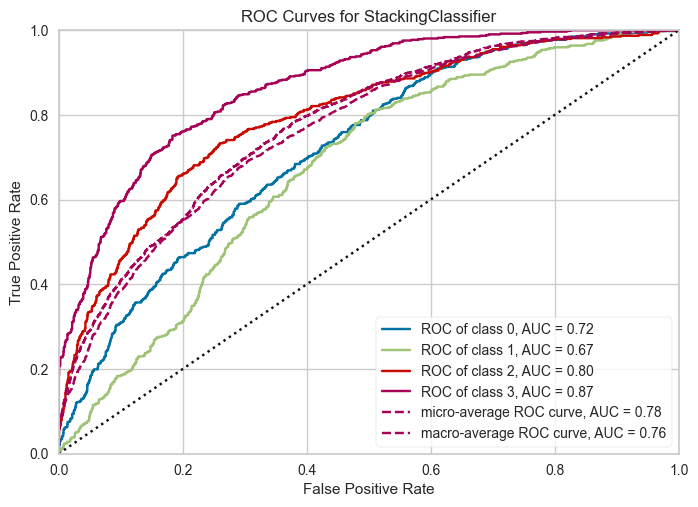

In [58]:
plot_model(modelo_ensamblado, plot = "auc" )

**Precision Recall Curve**

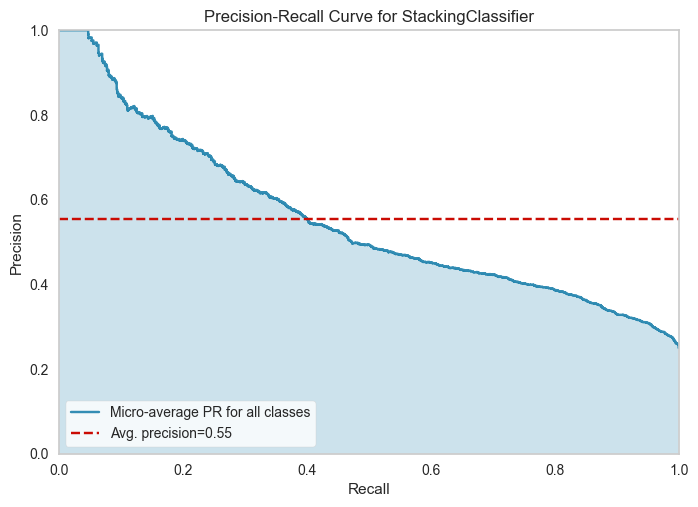

In [59]:
plot_model(modelo_ensamblado, plot = "pr")

**Tuned_custom_model**

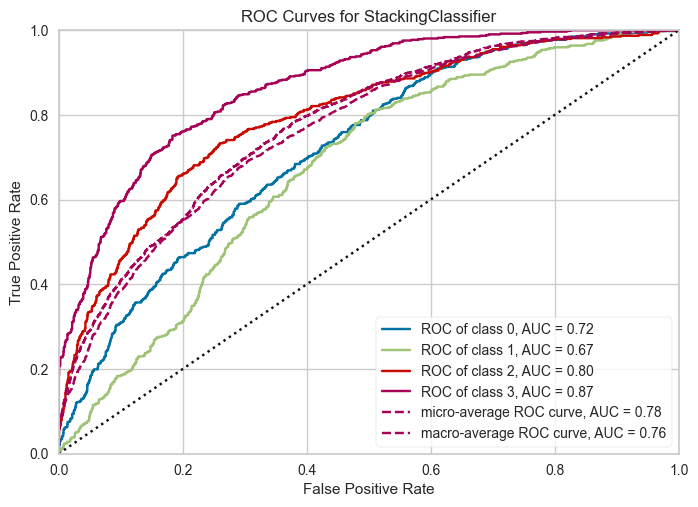

In [60]:
plot_model(modelo_ensamblado)

**Matriz de Confusión**

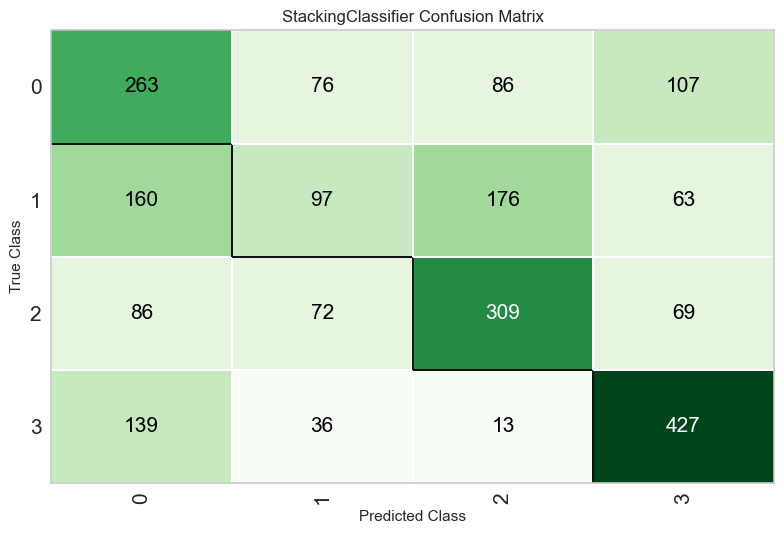

In [61]:
plot_model(modelo_ensamblado, plot = "confusion_matrix")

**Intepretación de la Matriz de Confusión - Confusion
Matrix**

- TN y TP - Acurrancy: Se puede observar que hay mayor efectividad de Verdaderos positivos y Falsos Positivos en la prediccion en las clases A(0), B(2), C(2), D(3), los que son Verdadero Positivo.

- Falso Negativos (FN) - Recall (Bajo Recall - Sesgo):
  - La clase real "A" (532 muestras) tiende dificultad para predecir (distinguir), hacia la clase D(118), C(99) y B(48) en ese orden de prioridad.
  - La Clase real "B" tiende dificultad para predecir (distinguir), hacia la clase C, A y D en ese orden de prioridad.
  - La Clase real "C" tiende dificultad para predecir (distinguir), hacia la clase A, D  y C en ese orden de prioridad.
  - La clase real "D" tiende dificultad para predecir (distinguir), hacia la clase A, B, y C en ese orden de prioridad.

- Falso Negativos (FP) - Precision (Baja Precision - Varianza):
  - La prediccion clase A (685 muestras) tiende a ser menos confiable (seguro) hacia la clase B(117), D(142) y C(99) en ese orden.
  - La prediccion Clase B tiende a ser menos confiable (seguro) hacia la clase A, C y D en ese orden.
  - La prediccion Clase C tiende a ser menos confiable (seguro) hacia la clase B, A y D en ese orden.
  - La prediccion clase D tiende a ser menos confiable (seguro) hacia la clase la clase B, D y C en ese orden.


**Curva de aprendizaje**

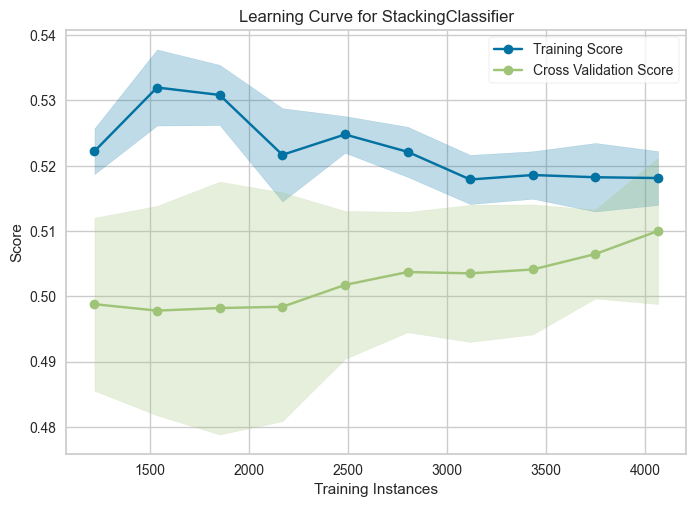

In [62]:
plot_model(modelo_ensamblado, plot = "learning")

**Importancia variables**

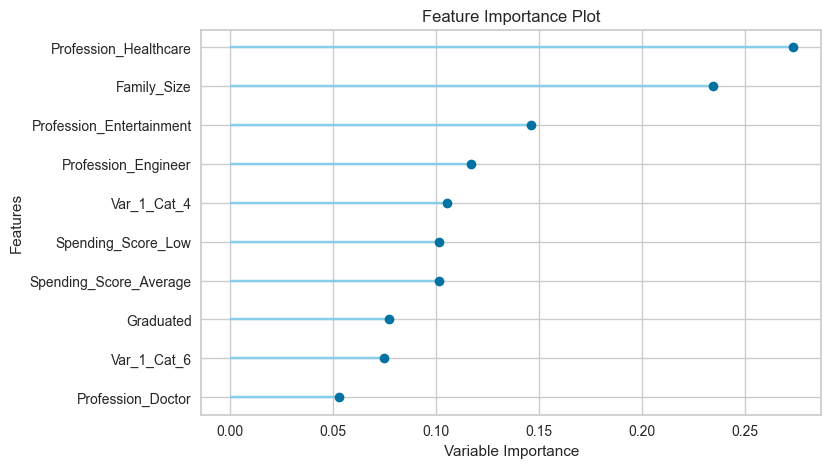

In [63]:
plot_model(modelo_optimizado, plot = "feature")

**Threshold**

- Importante: Como la varaible objetivo es tiene una Clasificación multiclase, (A,B,C,D), este grafico no se permite

In [64]:
#plot_model(modelo, plot = "threshold")

##**Evaluar el modelo**

Analizar el rendimiento del mejor modelo entrenado

In [65]:
evaluate_model(modelo_ensamblado, fold = 10)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##**Finalizar Modelo**

In [66]:
modelo_final = finalize_model(modelo_ensamblado)

##**Predecir modelo**

In [67]:
predict_test = predict_model(modelo_ensamblado, data = test)
#predict_model(modelo_optimizado)

Resultado de predicción

In [68]:
results = pull()
results.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.5118,0.7744,0.5118,0.5105,0.4999,0.3494,0.3543


In [69]:
predict_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prediction_label,prediction_score
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3,D,0.9000
1,Female,No,18,No,Healthcare,3.0,Low,4.0,Cat_6,3,D,0.8767
2,Female,No,58,No,Other,1.0,Average,3.0,Cat_3,1,B,0.3451
3,Male,Yes,56,No,Artist,1.0,Average,3.0,Cat_6,2,C,0.5060
4,Male,Yes,56,Yes,Other,1.0,High,2.0,Cat_6,0,B,0.3404


Guardamos los datos de predicción para resultado de la predicción

In [70]:
predict_test.to_excel("Datos_Prediccion_entrenamiento.xlsx")

##**Guardar Modelo**

In [71]:
save_model(modelo_final, 'Modelo_Segmentacion_Customer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('iterative_imputer',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=IterativeImputer(add_indicator=False,
                                                                  cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                               class_weight=None,
                                                                                               colsample_bytree=1....
                                                                     verbose=0,
                                                                     warm_start=False))],
                                     final_estimator=Logisti

## **Produccion**

### **Accediendo al modelo**

In [72]:
saved_modelo = load_model("Modelo_Segmentacion_Customer")

Transformation Pipeline and Model Successfully Loaded


### **Creando registro de cliente para evaluar**

In [73]:
cliente_nuevo = pd.DataFrame({'Gender'                : ['Male'],
                              'Ever_Married'       	  : ['Yes'],
                              'Age'	                  : [40],
                              'Graduated'	            : ['Yes'],
                              'Profession'            : ['Artist'],
                              'Work_Experience'       : [10],
                              'Spending_Score'      	: ['High'],
                              'Family_Size'     	    : [9],
                              'Var_1'	                : ['Cat_5']})

cliente_nuevo

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,Yes,40,Yes,Artist,10,High,9,Cat_5


### **Mostrando la predicción**

Ingresando los datos del cliente al modelo

In [74]:
nueva_prediccion = predict_model( saved_modelo, data = cliente_nuevo) #, probability_threshold = 0.4)
nueva_prediccion.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,prediction_label,prediction_score
0,Male,Yes,40,Yes,Artist,10,High,9,Cat_5,C,0.5682


#**Conclusiones**

1.  **Podemos concluir que las caracteristicas con mayor importancia en el modelo son: Profession. Family_size, Graduated y Spending_score**
2. **El utilizar el metodo ffill para el relleno de datos contribuyo a una considerable mejoria en el modelo.**

1. **Se seleccionar modelo lr - Logistic Regression" por lo siguiente:**
  - **Enfocan en disminuir el sesgo.**
  - **Se utiliza el mejor Acurrancy considerando que la variable objetivo tiene una distribucion equilibrada.**
  - ***Se ajusta los datos de train / test a 80/20 con mejores resultados.***
  - ***La velocidad de procesamiento del modelo es de la mas baja..***

2. **El modelo base es capaz de predecir en un 49 % de las observaciones del conjunto de datos de prueba y mejora a 50.al optimizar el modelo.**.

2. **Los resultados del modelo no son tan buenos en las categorias B y C.**

5. **No hubo mejoría en el modelo al utilizar las Variable: Age, Work Experience y Family_size, para generar una categoría "bin" (es necesario realizar más comprobaciones).**

5. **Para crear un modelo más robusto es necesario: (1) más datos sobre los clientes, (2) si hay más características relevantes**

3. **Los datos son insuficientes para mejorar el modelo, como nos sugiere la grafica de Curva de aprendizaje.**



